# Introduction
--------------

Here, I implement my linear-regression and k-means clustering classes to make regression predictions and classifications. I will show the time of each estimation methods along with visually representing the predictions/classifications made by each model. The point of this notebook isn't to actually make predictions and classifications but to just show that my home-made models work.

### Linear Regression
------------------------------
First up, build a linear regression model to predict home prices with differentiation estimation method. Then, I will use gradient descent to estimate a model from some smaller test data.

In [1]:
from linear_regression.linear_regression import LinearModel
import pandas as pd
import matplotlib.pyplot as plt
import time

In [30]:
df = pd.read_csv("linear_regression/homeprices.csv")
lm = LinearModel(df, "area", "price", "diff")

start = time.time()
output = lm.fit_model()
end = time.time()

diff_fit_time = end - start
print(f"It took {diff_fit_time} seconds to fit the model using differentiationm. Here's the output: \n {output}")
print("Number of houses:", df.shape[0])

It took 0.0003147125244140625 seconds to fit the model using differentiationm. Here's the output: 
 {'yint': 180616.43835616444, 'm': 135.7876712328767, 'r': 0.9789944401374038, 'r^2': 0.9584301138199487}
Number of houses: 5


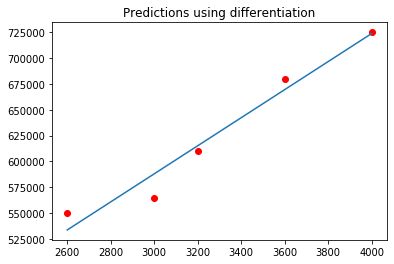

In [21]:
%matplotlib inline
preds = lm.make_predictions()
plt.plot(df.area, df.price, "ro", df.area, preds)
plt.title("Predictions using differentiation")
plt.show()

Now, let's use gradient descent to fit a model. **NOTE:** I pre-optimized the learning rate and # of iterations by hand to get a model that fits the data relatively well. 

I have learned that gradient descent is much more computationally expensive (assuming I implemented it correctly).

In [39]:
df = pd.DataFrame({"X": [1,2,4,6,8], "y": [1,2,4,7,8]})

lm = LinearModel(df, "X", "y", "gd")

start = time.time()
output = lm.fit_model(iterations = 10000, lr = .01)
end = time.time()

diff_fit_time = end - start
print(f"It took {diff_fit_time} seconds to fit the model using gradient descent. Here's the output: \n {output}")

It took 0.15227365493774414 seconds to fit the model using gradient descent. Here's the output: 
 {'yint': -0.030487804878046365, 'm': 1.0548780487804872, 'r': 0.9905301676945706, 'r^2': 0.9811500131130341}


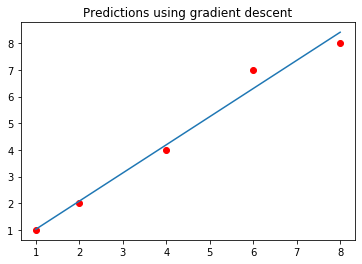

In [40]:
%matplotlib inline
preds = lm.make_predictions()
plt.plot(df.X, df.y, "ro", df.X, preds)
plt.title("Predictions using gradient descent")
plt.show()

### K-means Clustering
----------------------
I will implement my K-means algorithm to attempt to classify species from the iris dataset. My hypothesis is that most or all of the setosas will be classified correctly, but the versicolors and virginicas will not do very well. Accuracy and related metrics will be calculated.

Here's how the clusters actually are:

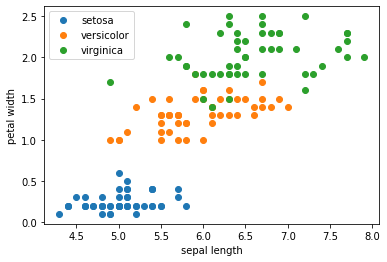

In [50]:
%matplotlib inline
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plta

df = sb.load_dataset("iris")
groups = df.groupby("species")

_, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.sepal_length, group.petal_width, marker='o', linestyle='', ms=6, label=name)
ax.legend()

plt.xlabel("sepal length")
plt.ylabel("petal width")
plt.show()

# COMPUTE ACCURACY/PRECISION/THOSE OTHER THIGNS AS MEASURES OF ERROR